# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3840,1245,1/28/2011,The Mechanic,"$42,500,000","$76,347,393","$29,121,498"
2947,2279,7/27/2007,Molière,"$21,600,000","$791,154","$635,733"
1122,3982,8/4/1998,The Players Club,"$5,000,000","$23,047,939","$23,047,939"
1481,1372,8/25/2000,The Art of War,"$40,000,000","$30,199,105","$30,199,105"
1808,3844,5/4/2002,National Lampoon's Van Wilder,"$6,000,000","$39,241,323","$21,305,259"
2768,1022,10/3/2006,Failure to Launch,"$50,000,000","$128,402,901","$88,715,192"
1857,1046,8/5/2002,Unfaithful,"$50,000,000","$119,114,494","$52,752,475"
1244,4766,5/3/1999,"Lock, Stock and Two Smoking Barrels","$1,350,000","$28,356,188","$3,897,569"
2234,5302,6/2/2004,The Lost Skeleton of Cadavra,"$100,000","$110,536","$110,536"
4381,2676,5/4/2013,Evil Dead,"$17,000,000","$97,778,356","$54,239,856"


In [5]:
data.shape

(5391, 6)

In [6]:
data.isna().values.any()

False

In [7]:
data.duplicated().values.any()

False

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
chars_to_rmv = ['$', ',']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
  for char in chars_to_rmv:
    data[col] = data[col].astype(str).str.replace(char, '')
  data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [10]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
6,4630,1927-12-08,Wings,2000000,0,0
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000
8,4240,1930-01-01,Hell's Angels,4000000,0,0
9,5043,1931-12-31,Mata Hari,558000,900000,900000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
stat_data = data.drop('Release_Date', axis=1)
stat_data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [13]:
# 1.
data['USD_Production_Budget'].mean()

31113737.57837136

In [14]:
# 2.
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [15]:
# 3.
print(f"Worldwide minimum is: {data['USD_Worldwide_Gross'].min()} and domestic minimum is: {data['USD_Domestic_Gross'].min()}")

Worldwide minimum is: 0 and domestic minimum is: 0


**4.** The bottom 25% films are in loss as we can see that they have a average production budget of \$5 Million but gross revenue of \$3.8 Million on average worldwide.

In [16]:
# 5.
print(f"Highest Production budget is: {data['USD_Production_Budget'].max()} and highest worldwide gross revenue of any film is: {data['USD_Worldwide_Gross'].max()}")

Highest Production budget is: 425000000 and highest worldwide gross revenue of any film is: 2783918982


In [17]:
# 6.
lowest_budget_film = data[data['USD_Production_Budget'] == data['USD_Production_Budget'].min()] # fetches out the row of the film with lowest budget
highest_budget_film = data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()] # fetches out the row of the film with highest budget
print(f"The lowest budget film is {lowest_budget_film['Movie_Title'].values[0]} and it has a gross revenue of {lowest_budget_film['USD_Worldwide_Gross'].values[0]}")
print(f"The highest budget film is {highest_budget_film['Movie_Title'].values[0]} and it has a gross revenue of {highest_budget_film['USD_Worldwide_Gross'].values[0]}")

The lowest budget film is My Date With Drew and it has a gross revenue of 181041
The highest budget film is Avatar and it has a gross revenue of 2783918982


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
zero_domestic = data[data['USD_Domestic_Gross'] == 0]
print(f"There are {zero_domestic.shape[0]} films that have grossed $0 domestically.")
zero_domestic.sort_values(by='USD_Production_Budget', ascending=False).head(10)

There are 512 films that have grossed $0 domestically.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [19]:
zero_international = data[data['USD_Worldwide_Gross'] == 0]
print(f"There are {zero_international.shape[0]} films that have grossed $0 worldwide.")
zero_international.sort_values(by='USD_Production_Budget', ascending=False).head(10)

There are 357 films that have grossed $0 worldwide.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [21]:
international_releases = data.loc[(data['USD_Domestic_Gross'] == 0) & (data['USD_Worldwide_Gross'] != 0)]
print(f'Number of international releases: {international_releases.shape[0]}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [23]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [34]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [26]:
future_releases = data[data['Release_Date'] >= scrape_date]
print(f'{len(future_releases)} films have not yet had a chance to be screened in the box office.')
future_releases

7 films have not yet had a chance to be screened in the box office.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [28]:
data_clean = data.drop(future_releases.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [32]:
loss_films = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f"{round(len(loss_films) / len(data_clean) * 100, 2)}% of film's production costs exceeded the worldwide gross revenue.")

37.28% of film's production costs exceeded the worldwide gross revenue.


# Seaborn for Data Viz: Bubble Charts

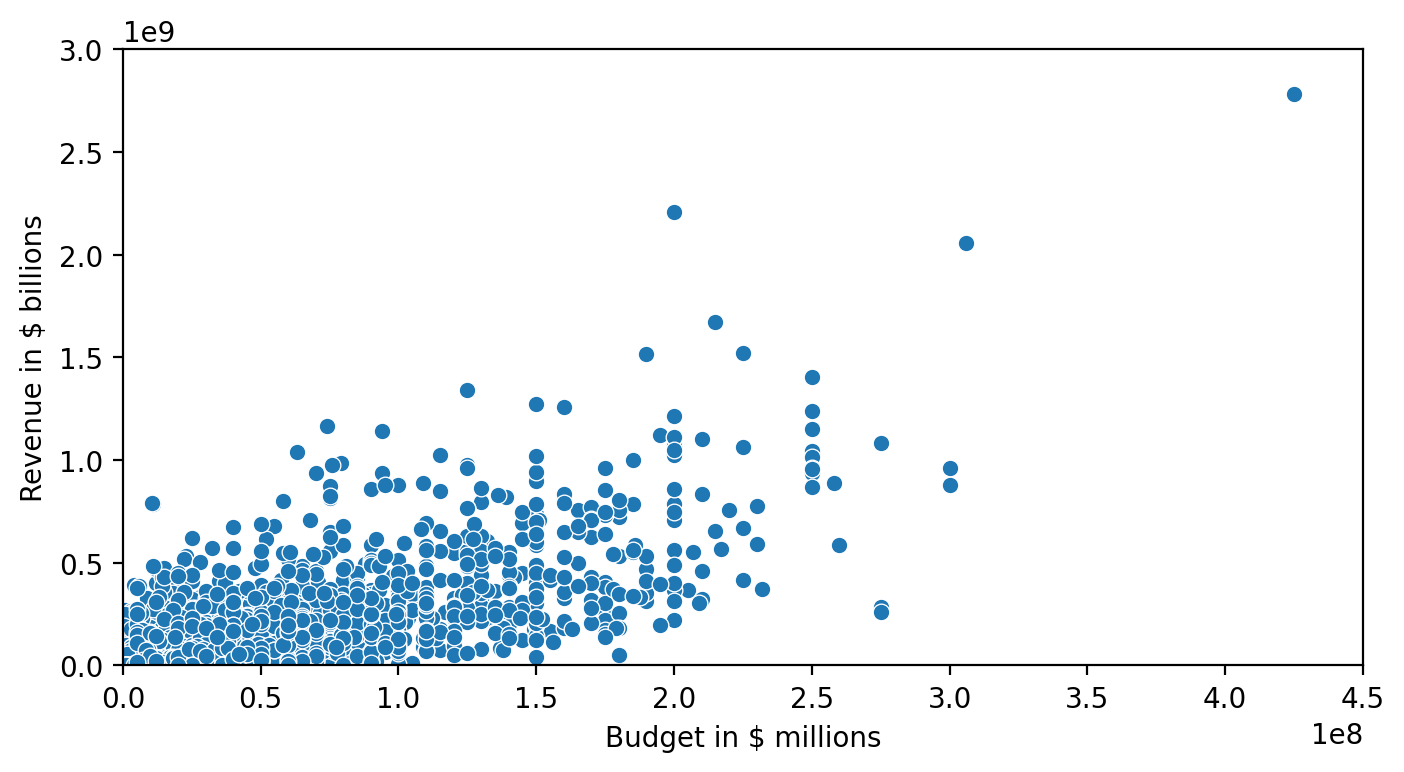

In [39]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(
    data = data_clean,
    x = 'USD_Production_Budget',
    y = 'USD_Worldwide_Gross'
)

ax.set(
    ylim = (0, 3000000000),
    xlim = (0, 450000000),
    ylabel = 'Revenue in $ billions',
    xlabel = 'Budget in $ millions'
)

plt.show()

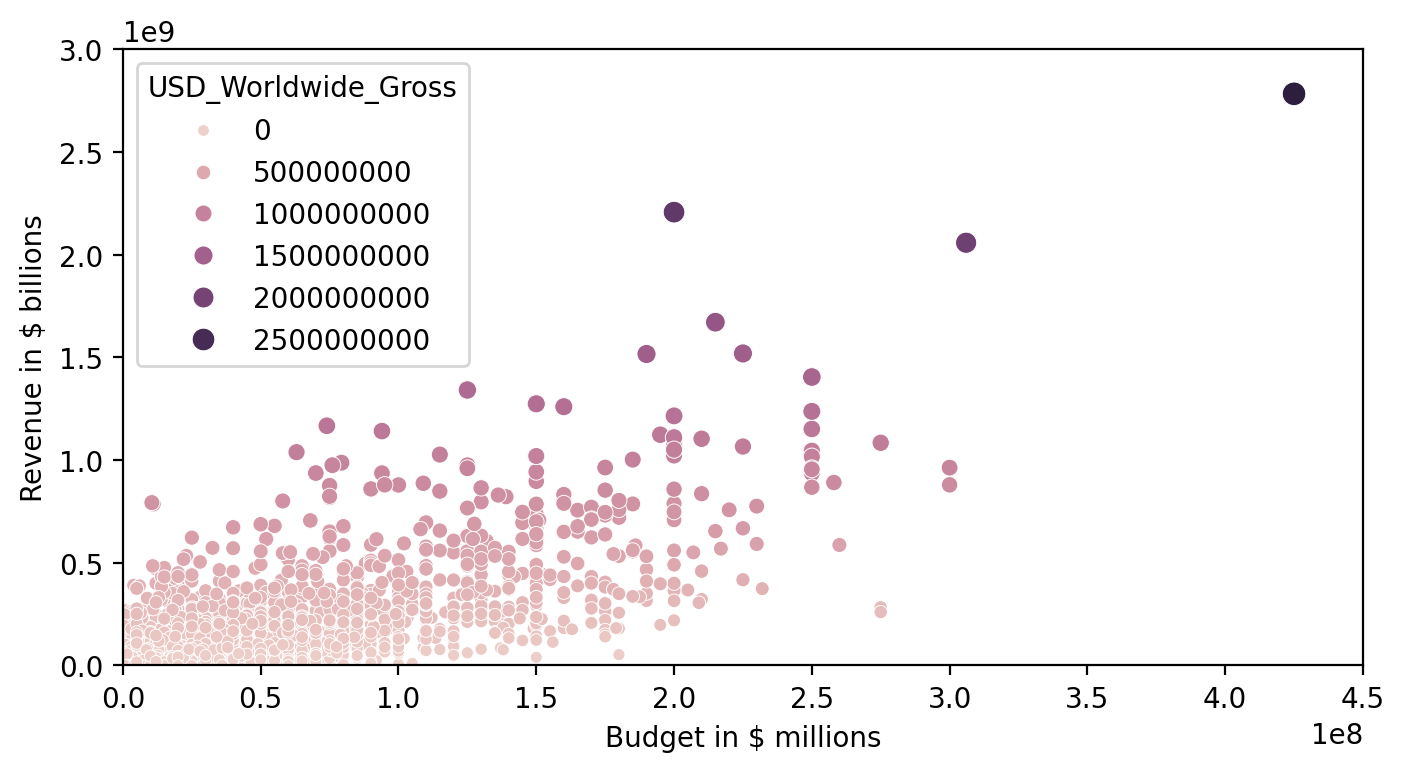

In [40]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(
    data = data_clean,
    x = 'USD_Production_Budget',
    y = 'USD_Worldwide_Gross',
    hue = 'USD_Worldwide_Gross', # color
    size = 'USD_Worldwide_Gross', # size
)

ax.set(
    ylim = (0, 3000000000),
    xlim = (0, 450000000),
    ylabel = 'Revenue in $ billions',
    xlabel = 'Budget in $ millions'
)

plt.show()

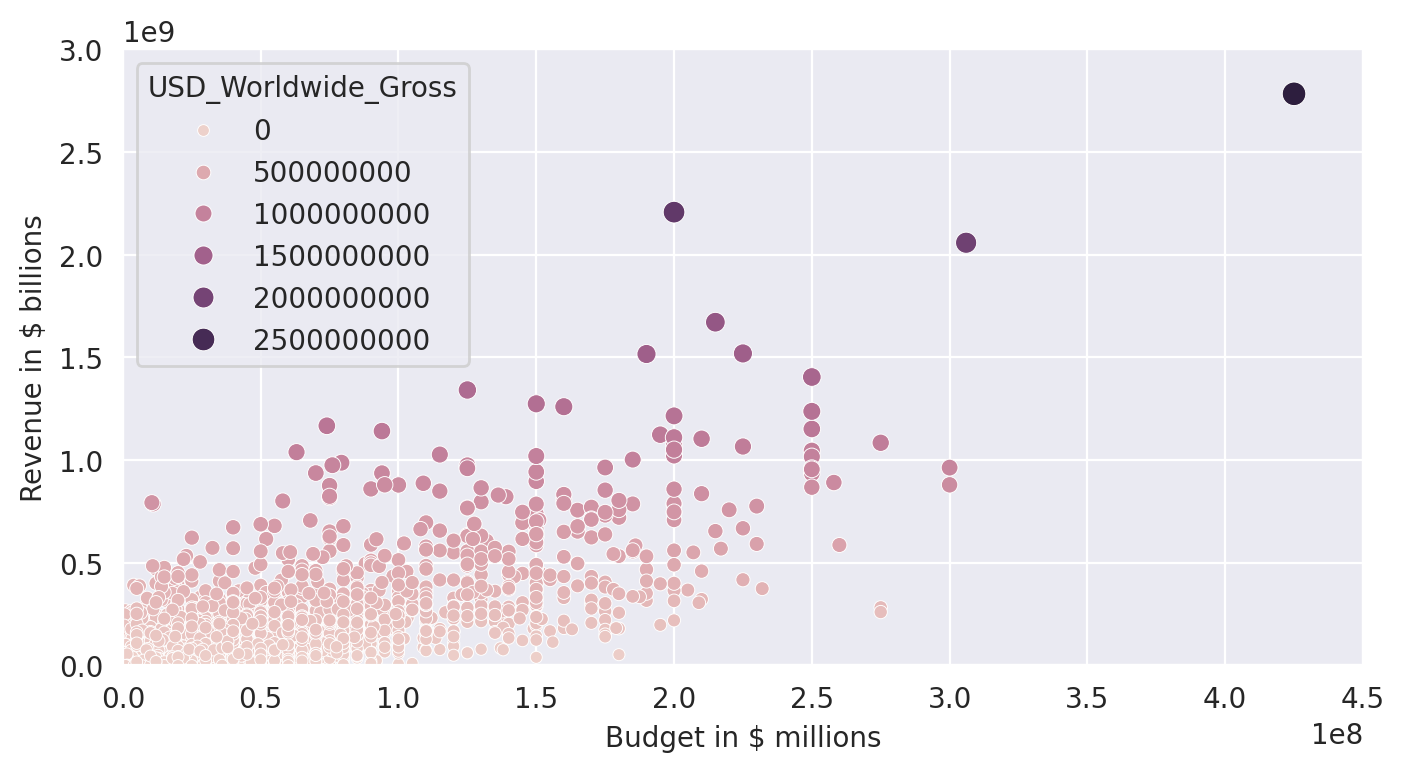

In [41]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(
      data = data_clean,
      x = 'USD_Production_Budget',
      y = 'USD_Worldwide_Gross',
      hue = 'USD_Worldwide_Gross', # color
      size = 'USD_Worldwide_Gross', # size
  )

  ax.set(
      ylim = (0, 3000000000),
      xlim = (0, 450000000),
      ylabel = 'Revenue in $ billions',
      xlabel = 'Budget in $ millions'
  )

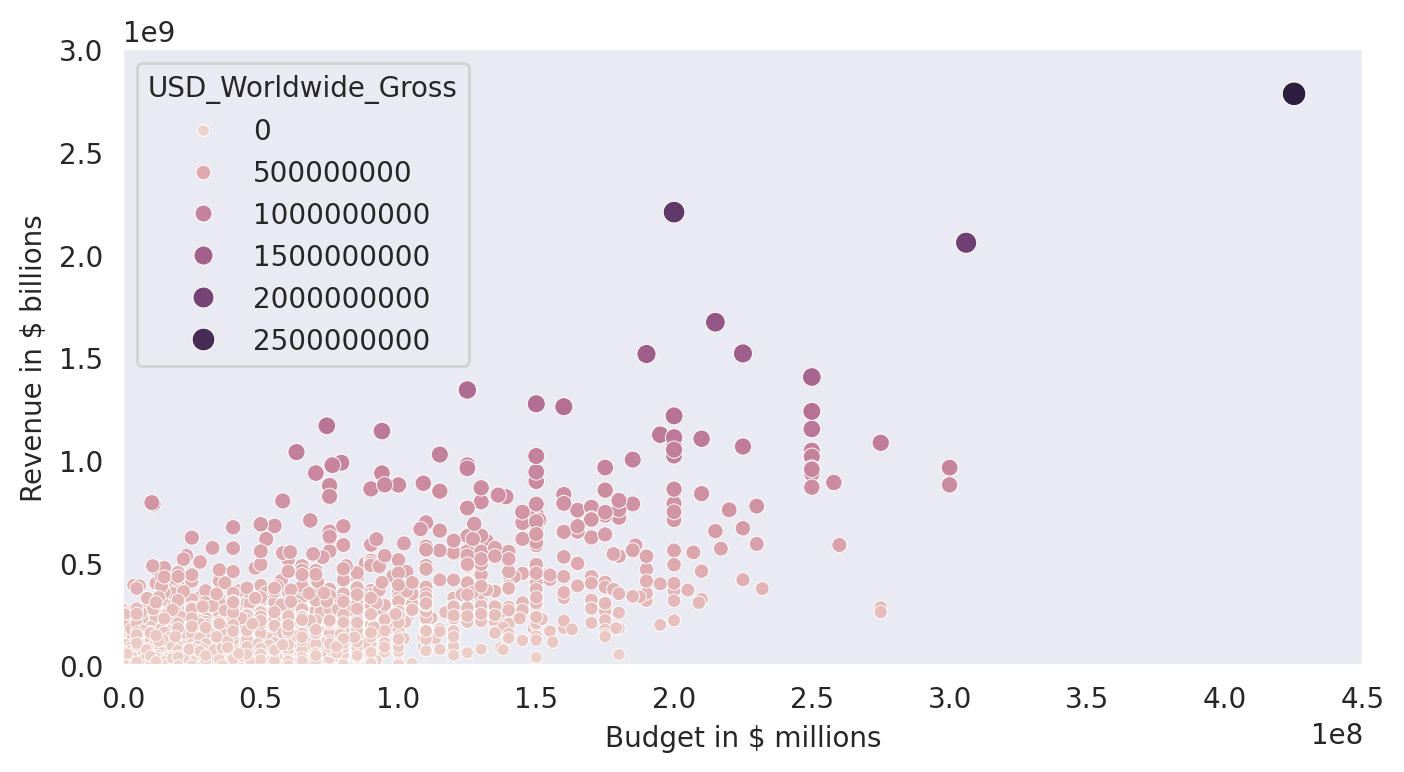

In [45]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('dark'):
  ax = sns.scatterplot(
      data = data_clean,
      x = 'USD_Production_Budget',
      y = 'USD_Worldwide_Gross',
      hue = 'USD_Worldwide_Gross', # color
      size = 'USD_Worldwide_Gross', # size
  )

  ax.set(
      ylim = (0, 3000000000),
      xlim = (0, 450000000),
      ylabel = 'Revenue in $ billions',
      xlabel = 'Budget in $ millions'
  )

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



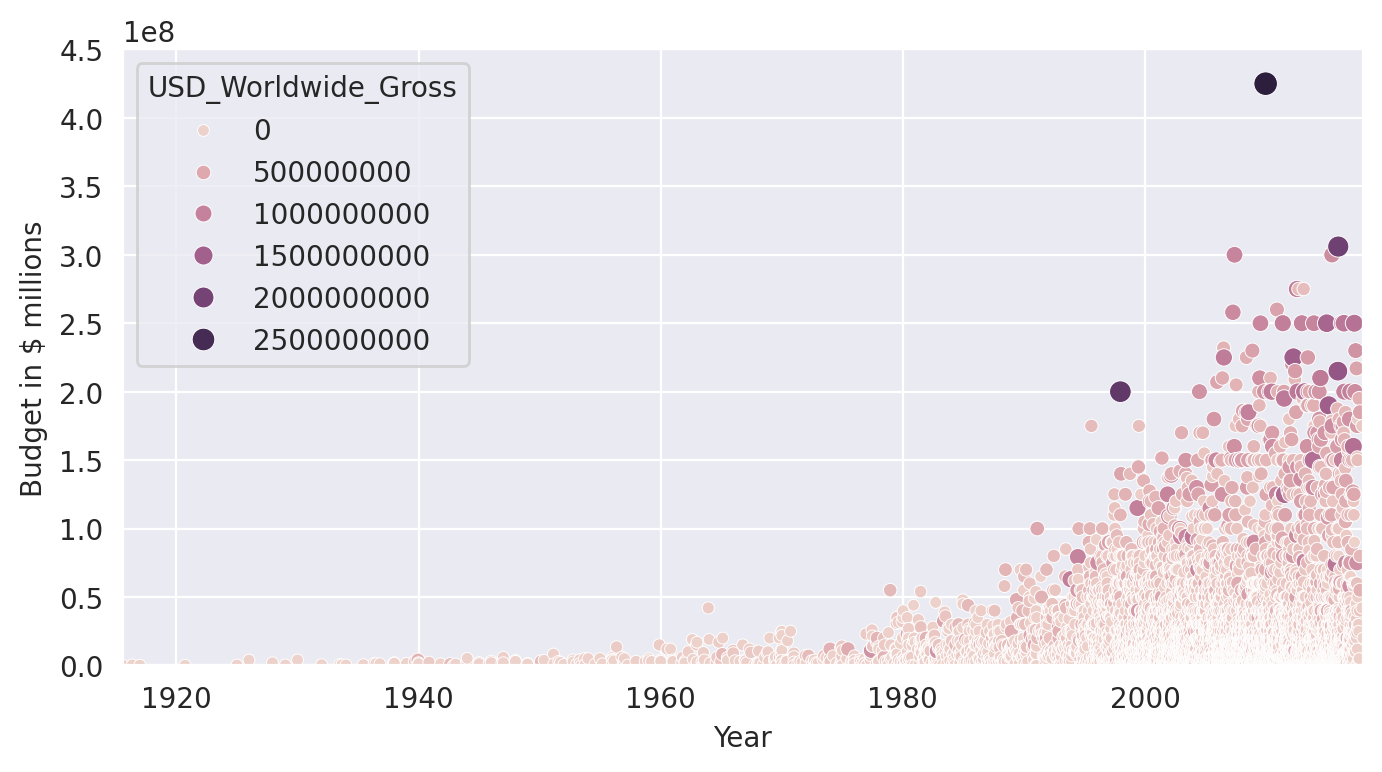

In [47]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(
      data = data_clean,
      x = 'Release_Date',
      y = 'USD_Production_Budget',
      hue = 'USD_Worldwide_Gross', # color
      size = 'USD_Worldwide_Gross', # size
  )

  ax.set(
      ylim = (0, 450000000),
      xlim = (data_clean['Release_Date'].min(), data_clean['Release_Date'].max()),
      ylabel = 'Budget in $ millions',
      xlabel = 'Year'
  )

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [57]:
data_clean['Decade'] = data_clean['Release_Date'].dt.year // 10 * 10
data_clean.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5053,2578,2015-11-09,The Perfect Guy,18000000,60264805,57017904,2010
686,2977,1993-07-23,Poetic Justice,14000000,27450453,27450453,1990
3270,21,2008-11-14,Quantum of Solace,230000000,591692078,169368427,2000
970,3303,1997-05-12,Good Will Hunting,10000000,225933435,138433435,1990
3695,3740,2010-07-30,Get Low,7000000,10828305,9176933,2010
1531,253,2000-11-17,How the Grinch Stole Christmas,123000000,345141403,260044825,2000
3620,1900,2010-04-16,Kick-Ass,28000000,97531134,48071303,2010
3626,548,2010-04-22,Oceans,80000000,86787530,19422319,2010
488,2050,1987-11-20,The Last Emperor,25000000,43988888,43984987,1980
2383,3025,2005-02-18,Der Untergang,13500000,93631744,5501940,2000


In [58]:
# or
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])
data_clean['Decade'] = dt_index.year // 10 * 10
data_clean.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
4721,4214,2014-11-04,Joe,4000000,373375,373375,2010
5104,4644,2015-12-31,Wind Walkers,2000000,0,0,2010
3350,1027,2009-03-20,Knowing,50000000,186450317,79957634,2000
1154,612,1998-10-23,Soldier,75000000,14623082,14623082,1990
5206,4373,2016-06-24,Swiss Army Man,3000000,5100863,4210454,2010
3078,1782,2008-01-25,Meet the Spartans,30000000,84646831,38233676,2000
5176,278,2016-04-22,The Huntsman: Winter’s War,115000000,165149302,48003015,2010
3372,354,2009-05-06,Land of the Lost,100000000,69548641,49438370,2000
3647,2290,2010-05-11,For Colored Girls,21000000,38017873,37729698,2010
2626,1033,2006-03-17,V for Vendetta,50000000,130214162,70511035,2000


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [59]:
old_films = data_clean[data_clean['Decade'] <= 1960]
new_films = data_clean[data_clean['Decade'] > 1960]

In [60]:
old_films.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


In [62]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [63]:
old_films.sort_values(by='USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


In [61]:
new_films.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
158,4855,1970-01-01,Beyond the Valley of the Dolls,1000000,9000000,9000000,1970
159,5027,1970-03-26,Woodstock,600000,34505110,34505110,1970
160,4259,1970-05-13,The Ballad of Cable Hogue,3716946,5000000,3500000,1970
161,4349,1970-05-26,Beneath the Planet of the Apes,3000000,17489009,17489009,1970
162,2598,1970-06-24,Catch-22,18000000,24911670,24911670,1970


# Seaborn Regression Plots

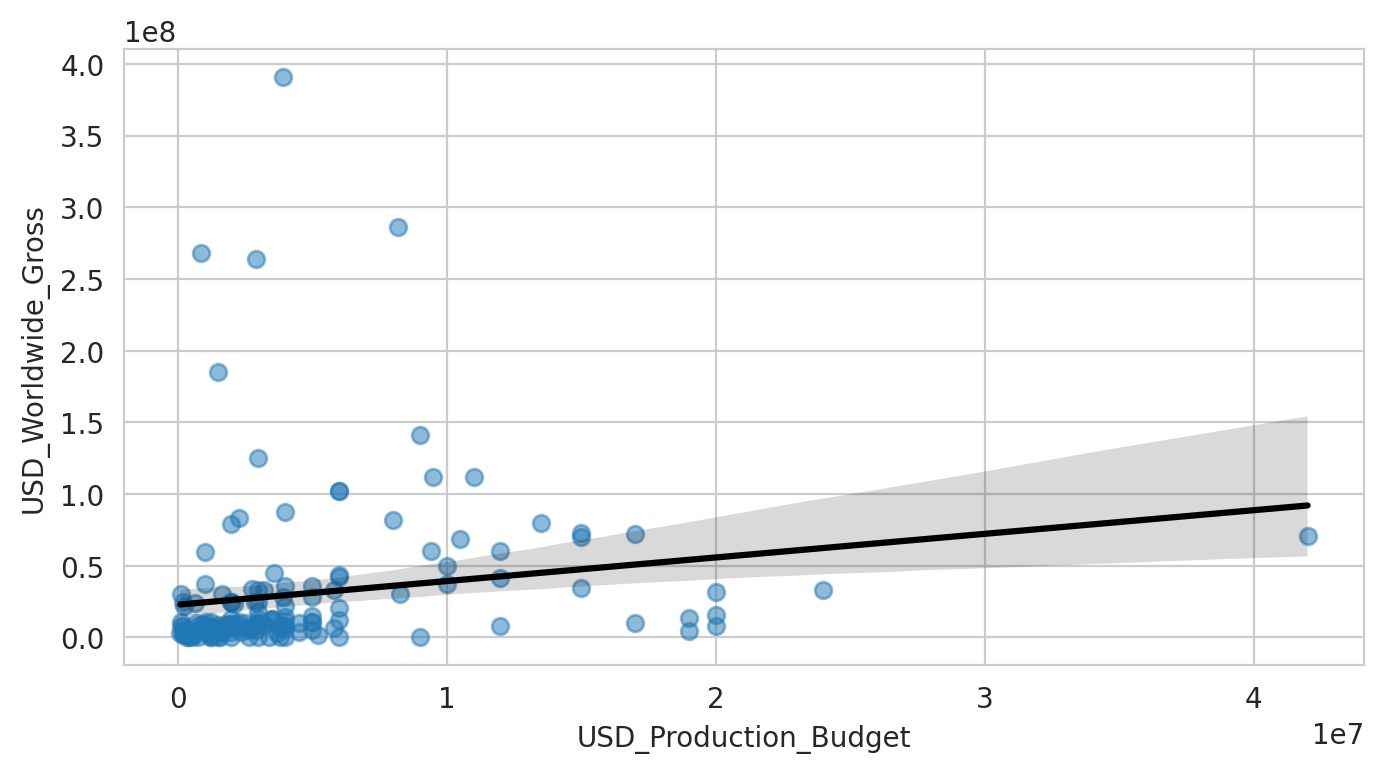

In [65]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.regplot(
      data = old_films,
      x = 'USD_Production_Budget',
      y = 'USD_Worldwide_Gross',
      scatter_kws = {'alpha': 0.5},
      line_kws = {'color': 'black'}
  )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

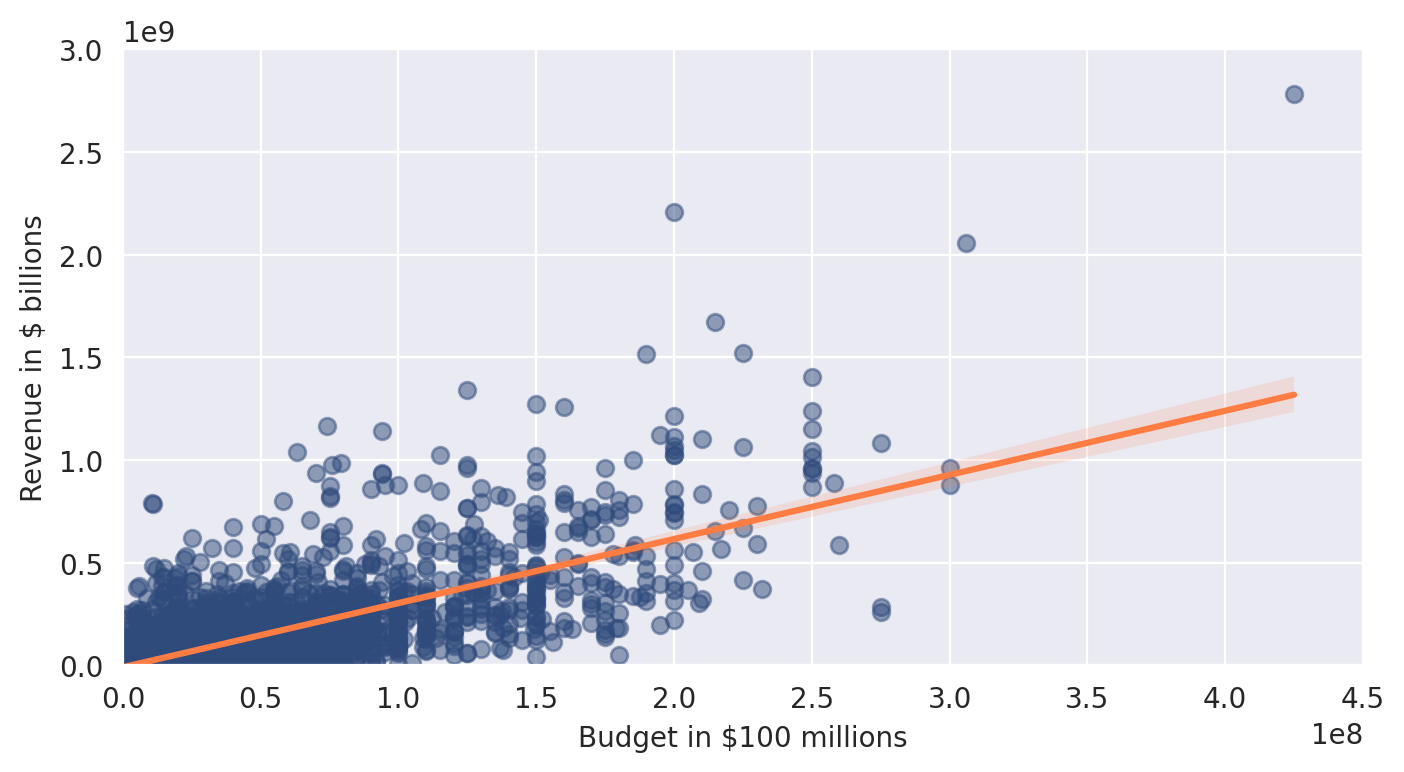

In [72]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(
          data = new_films,
          x = 'USD_Production_Budget',
          y = 'USD_Worldwide_Gross',
          color =  '#2f4b7c',
          scatter_kws = {'alpha': 0.5},
          line_kws = {'color': '#ff7c43'}
        )
  ax.set(
      ylim = (0, 3000000000),
      xlim = (0, 450000000),
      ylabel = 'Revenue in $ billions',
      xlabel = 'Budget in $100 millions'
  )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [75]:
regression = LinearRegression()

# Creating new DataFrames as our Linear Regression model does not like taking Pandas(e.g. new_films.USD_Production_Budget) series as input
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Fit the best-fit line
regression.fit(X, y)

LinearRegression()

In [76]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [77]:
# Theta one
regression.coef_

array([[3.12259592]])

In [78]:
# R-squared
regression.score(X,y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [79]:
# Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Fit the best-fit line
regression.fit(X, y)

LinearRegression()

In [80]:
# Theta zero
regression.intercept_

array([22821538.63508039])

In [81]:
# Theta one
regression.coef_

array([[1.64771314]])

In [82]:
# R-squared
regression.score(X,y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [89]:
budget = 350000000
revenue_est = regression.intercept_[0] + regression.coef_[0, 0]*budget
revenue_est = round(revenue_est, -6) # round figures the amount to 600 million
print(f'The estimated revenue for a $350 M budget film is ${round(revenue_est/1000000)} M')

The estimated revenue for a $350 M budget film is $600 M
